# Face Mask Detection

# Face Mask Detection Using Transfer Learning with Inception V3

## Introduction


In this project, we aim to build a Convolutional Neural Network (CNN) for detecting whether a person is wearing a face mask or not. This is an important task, especially in the context of public health and safety during pandemics, where enforcing mask-wearing policies can help mitigate the spread of contagious diseases.

To improve model performance and reduce training time, we use transfer learning, leveraging the powerful Inception V3 model, which has been pre-trained on the ImageNet dataset. By fine-tuning this pre-trained model, we can adapt it to our specific task of face mask classification.

The problem is formulated as a binary classification task with two classes:
- **Face with Mask**
- **Face without Mask**


### Objectives:
- Utilize Inception V3 for transfer learning.
- Train the model on a labeled dataset of face images.
- Evaluate the performance of the model and make predictions on unseen data.

By using transfer learning, we significantly reduce the time needed to train the model from scratch while also benefiting from the strong feature extraction capabilities of the Inception V3 architecture.

# Inception V3: Overview

## Introduction

Inception V3 is a deep learning convolutional neural network (CNN) architecture that is part of the Inception family, developed by Google. It was introduced in the paper *"Rethinking the Inception Architecture for Computer Vision"* in 2015 and has since become a popular choice for image classification tasks due to its efficiency and accuracy.

## Key Features

1. **Inception Modules**: 
   - The architecture utilizes inception modules, which apply multiple filters of different sizes (1x1, 3x3, 5x5) to the same input. This allows the network to learn various features simultaneously, capturing both fine and coarse details.
   - It also incorporates 1x1 convolutions for dimensionality reduction, which helps decrease the computational load while retaining important information.

2. **Reduction Modules**: 
   - To down-sample the feature maps and reduce the spatial dimensions, Inception V3 uses reduction modules. These modules help control the size of the network while maintaining feature representation.

3. **Factorization**: 
   - Inception V3 employs factorization techniques, such as decomposing larger convolutions (e.g., 5x5) into smaller convolutions (e.g., two 3x3 convolutions) to reduce the computational complexity without sacrificing performance.

4. **Auxiliary Classifiers**: 
   - The model includes auxiliary classifiers during training to help combat the vanishing gradient problem, especially in very deep networks. These auxiliary outputs are connected to intermediate layers, providing additional gradient signals.

5. **Label Smoothing**: 
   - This technique is used to prevent the model from becoming overconfident about its predictions, improving generalization by softening the target labels.

6. **Batch Normalization**: 
   - Inception V3 incorporates batch normalization layers, which help stabilize and accelerate training by normalizing the inputs to each layer.

## Architecture

Inception V3 has a complex architecture consisting of multiple inception and reduction modules, typically including:
- Input Layer
- Convolutional Layers
- Inception Modules (with 1x1, 3x3, and 5x5 convolutions)
- Reduction Modules (for down-sampling)
- Fully Connected Layers
- Output Layer (Softmax for classification)

The network consists of approximately 23 layers deep when counting the inception modules.

## Applications

Inception V3 has been widely used in various applications, including:
- **Image Classification**: Achieving state-of-the-art performance on benchmark datasets such as ImageNet.
- **Object Detection**: Integrated into frameworks like TensorFlow Object Detection API.
- **Transfer Learning**: Commonly used as a base model for transfer learning tasks in domains such as medical imaging, agriculture, and more.
- **Feature Extraction**: Used to extract features from images for various machine learning tasks.

## Conclusion

Inception V3 represents a significant advancement in convolutional neural networks, combining multiple techniques to improve performance and efficiency. Its modular design and powerful feature extraction capabilities make it a versatile choice for various image-related tasks, solidifying its place in the deep learning landscape.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
with_mask = glob('with_mask 1/with_mask 1/*.jpg')
without_mask = glob('without_mask/without_mask/*.jpg')

In [3]:
images = []
labels = []

for i in with_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in without_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

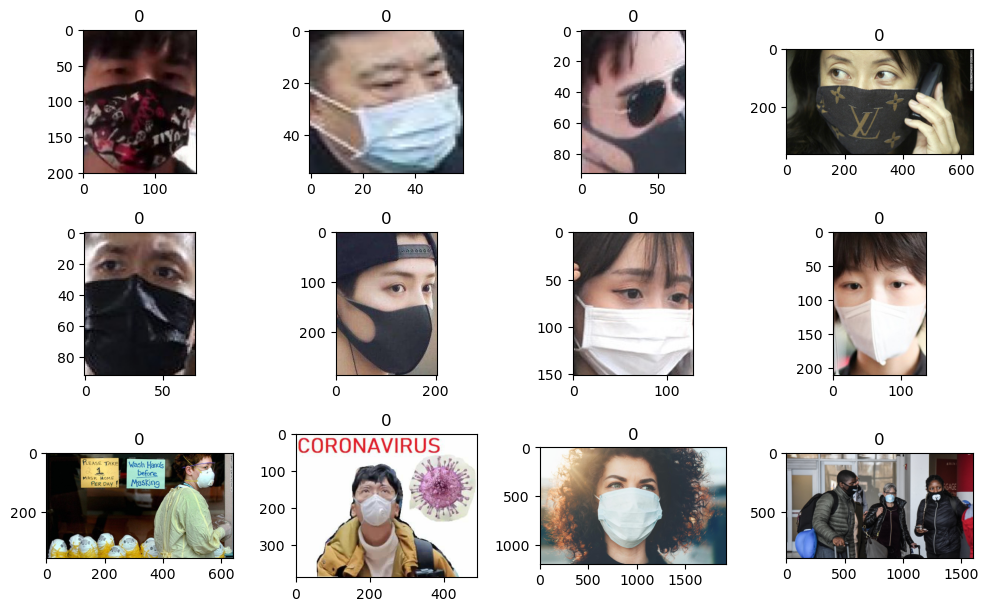

In [9]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
plt.tight_layout()

In [4]:
images,labels = shuffle(images,labels)

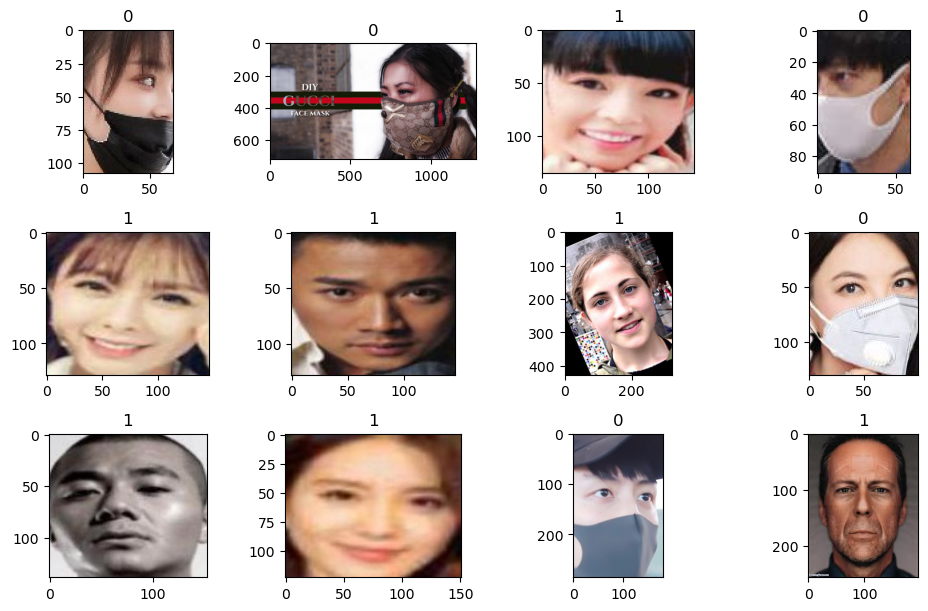

In [11]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
plt.tight_layout()

In [18]:
X = []

for i in images:
    X.append(resize(i, (299,299,3)))

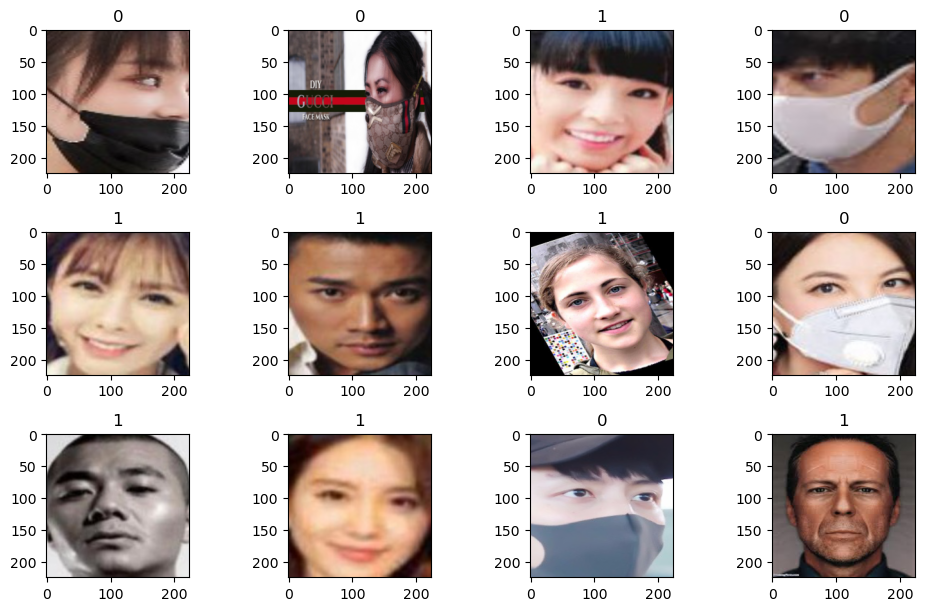

In [13]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(labels[i])
plt.tight_layout()

In [19]:
X = np.array(X)
y = np.array(labels)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [21]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1"

In [22]:
hub.load(feature_extractor_model)

2024-10-20 20:53:51.280947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 20:53:51.726712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (299,299,3), trainable = False
)

2024-10-20 20:54:07.760030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 20:54:08.073361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [24]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [25]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10


2024-10-20 20:57:03.402678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9755

2024-10-20 20:58:19.205128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 84s 900ms/step - loss: 0.0646 - accuracy: 0.9755 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/10
83/83 [==============================] - 70s 846ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/10
83/83 [==============================] - 69s 830ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.0147 - val_accuracy: 0.9929
Epoch 4/10
83/83 [==============================] - 69s 838ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0158 - val_accuracy: 0.9929
Epoch 5/10
83/83 [==============================] - 67s 811ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/10
83/83 [==============================] - 67s 809ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0221 - val_accuracy: 0.9929
Epoch 7/10
83/83 [==============================] - 68s 823ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0059 - val_accuracy: 0.9929
Epoch 8/10

In [33]:
y_pred = model.predict(X_test)

22/22 [==============================] - 17s 760ms/step


In [34]:
predicted_classes = (y_pred > 0.5).astype(int)


In [36]:
accuracy_score(y_test,predicted_classes)

0.9971305595408895

<Axes: >

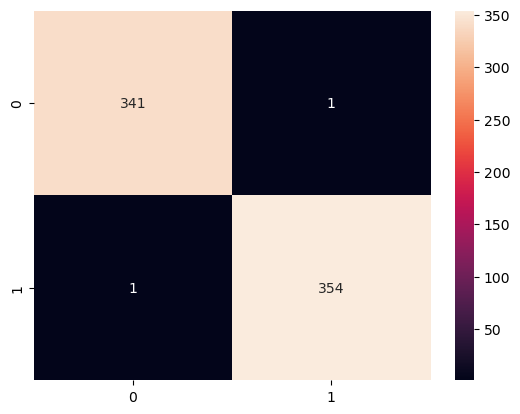

In [37]:
sns.heatmap(confusion_matrix(y_test,predicted_classes), annot = True, fmt = 'd')

In [38]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       355

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



---

## Conclusion

This project successfully demonstrates the application of transfer learning using the Inception V3 model for detecting face masks. By leveraging the power of a pre-trained network, we were able to quickly adapt it to our specific classification task, achieving efficient and accurate results.

The model can be further improved with more data and fine-tuning, providing a robust tool for public health monitoring and ensuring compliance with mask-wearing policies.

---

> "Empowering technology for a safer tomorrow."

---

<div align="center">
  <img src="https://via.placeholder.com/600x5/FF5733/FFBD33?text=+" width="80%" alt="separator" />
</div>

                    Thank You for Exploring the Project!

<div align="center">
  <img src="https://via.placeholder.com/600x5/33FF57/3380FF?text=+" width="80%" alt="separator" />
</div>

---